# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [243]:
import pandas as pd

cluster_data = pd.read_csv("Employee_Retention.csv")
cluster_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


### Part 1A: 10 points
Check if there are any missing values. If yes, fill them with appropriate methods. Scale the data for further processing. Display the processed data. Regardless of any action, explain your decision for the action.

In [244]:
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   left                   14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


In [245]:
cluster_data.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
dtype: int64

In [246]:
cluster_data.dropna(inplace=True) #dropping null values if in case any here we dont have any null values


In [247]:
cluster_data.shape

(14999, 8)

It is essential to identify any outliers or non-normal distributions in the columns before scaling the data. If there are any other research findings, outliers may have an impact on scaling. If there are any non-normal distributions, scaling could also have a negative effect on the distributions. As a result, we must examine the distribution of the column distributions themselves to determine whether or not they are suitable for scaling. We may employ histograms to see how the distributions of each column are were dispersed.

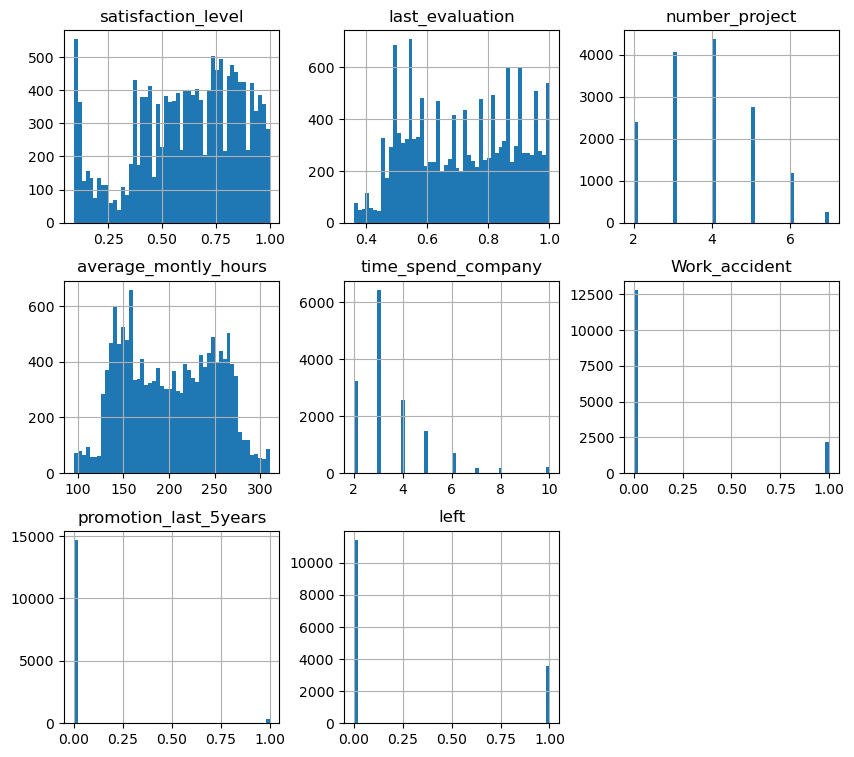

In [248]:
import matplotlib.pyplot as plt

cluster_data.hist(bins=50, figsize=(10,9))
plt.show()

In [249]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(cluster_data), columns=cluster_data.columns)
scaled_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,1.788917
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,1.788917
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,1.788917
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,1.788917
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,1.788917


### Part 1B: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 3 to 6 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

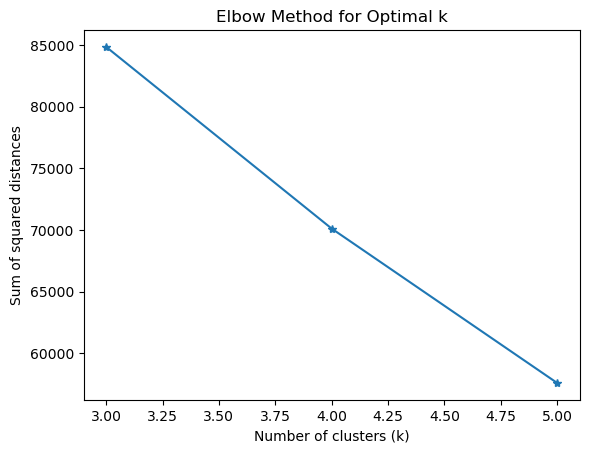

In [251]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate SSE for different values of k
sse = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot SSE against k
plt.plot(range(3, 6), sse, marker='*')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()


In the above plot for the range 3 to 6 we are unable to find the k value.so we have choosen the range of (2,13) to get clear understanding of elbow point so that we can choose the best k value.

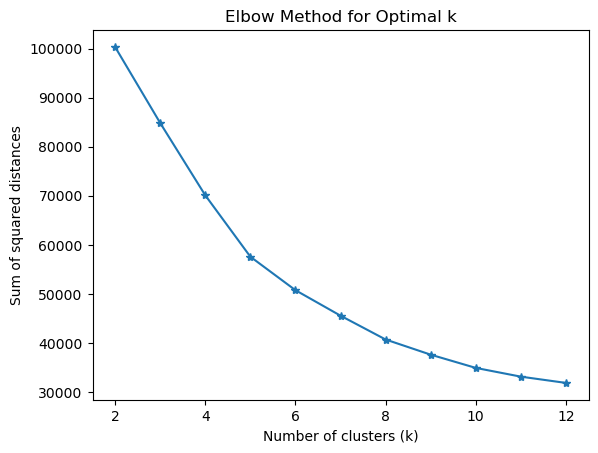

In [252]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate SSE for different values of k
sse = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot SSE against k
plt.plot(range(2, 13), sse, marker='*')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()


# Interpret the results

In the Elbow method, we are actually varying the number of clusters (K) from 3 – 6. For each value of K, we are calculating SSE (Cluster Sum of Square). SSE is the sum of the squared distance between each point and the centroid in a cluster. When we plot the SSE with the K value, the plot looks like an Elbow. As the number of clusters increases, the SSE value will start to decrease. When we analyze the graph, we can see that the graph will rapidly change at a point K=5  and thus creating an elbow shape. This is because the SSE decreases more rapidly for k=5 than for k=4 or k=6, and the rate of decrease starts to level off for k=6. From this point, the graph moves almost parallel to the X-axis. The K value which is 5 corresponding to this point is the optimal value of K or an optimal number of clusters.

### Part 1C: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2,12). Explain which K value you selected from the results and why?

Silhouette score for k = 2: 0.260
Silhouette score for k = 3: 0.265
Silhouette score for k = 4: 0.289
Silhouette score for k = 5: 0.338
Silhouette score for k = 6: 0.352
Silhouette score for k = 7: 0.290
Silhouette score for k = 8: 0.309
Silhouette score for k = 9: 0.304
Silhouette score for k = 10: 0.314
Silhouette score for k = 11: 0.306
Silhouette score for k = 12: 0.296


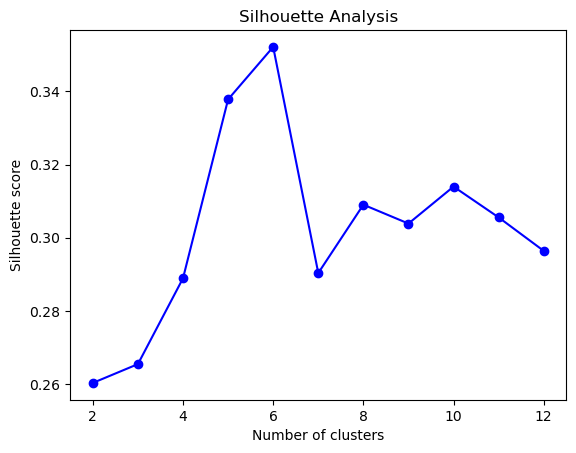

In [253]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
cluster_data = pd.read_csv('Employee_Retention.csv')

# Compute Silhouette scores for k from 2 to 12
silhouette_scores = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f"Silhouette score for k = {k}: {score:.3f}")

# Plot Silhouette scores against the number of clusters (k)
plt.plot(range(2, 13), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis')
plt.show()


In [254]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
cluster_data = pd.read_csv('Employee_Retention.csv')


# Compute Silhouette scores and cluster thickness/density for k from 2 to 12
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)

    # Compute cluster thickness and density
    centers = kmeans.cluster_centers_
    distances = np.linalg.norm(scaled_data - centers[labels], axis=1)
    thickness = np.mean(distances)
    density = score / thickness

    print(f"For k = {k}:")
    print(f" - Silhouette score: {score:.3f}")
    print(f" - Cluster thickness: {thickness:.3f}")
    print(f" - Cluster density: {density:.3f}")

 


For k = 2:
 - Silhouette score: 0.260
 - Cluster thickness: 2.378
 - Cluster density: 0.109
For k = 3:
 - Silhouette score: 0.265
 - Cluster thickness: 2.104
 - Cluster density: 0.126
For k = 4:
 - Silhouette score: 0.289
 - Cluster thickness: 1.995
 - Cluster density: 0.145
For k = 5:
 - Silhouette score: 0.338
 - Cluster thickness: 1.795
 - Cluster density: 0.188
For k = 6:
 - Silhouette score: 0.356
 - Cluster thickness: 1.701
 - Cluster density: 0.209
For k = 7:
 - Silhouette score: 0.290
 - Cluster thickness: 1.564
 - Cluster density: 0.186
For k = 8:
 - Silhouette score: 0.309
 - Cluster thickness: 1.470
 - Cluster density: 0.210
For k = 9:
 - Silhouette score: 0.304
 - Cluster thickness: 1.404
 - Cluster density: 0.217
For k = 10:
 - Silhouette score: 0.314
 - Cluster thickness: 1.358
 - Cluster density: 0.231
For k = 11:
 - Silhouette score: 0.306
 - Cluster thickness: 1.316
 - Cluster density: 0.232
For k = 12:
 - Silhouette score: 0.296
 - Cluster thickness: 1.292
 - Cluster 

The silhouette score is a measure of how well each data point fits into its assigned cluster, with values closer to 1 indicating better clustering. Based on the results, the silhouette scores generally increase as the number of clusters (k) increases, with the highest score of 0.356 at k=6. However, there are some values of k that have lower silhouette scores, such as k=2 and k=7, indicating that these may not be optimal choices for the number of clusters.

In addition to the silhouette score, we also calculated the cluster thickness and cluster density for each value of k. Cluster thickness measures the average distance between each data point and its nearest neighboring cluster, while cluster density measures the average distance between data points within the same cluster. Ideally, we want to choose a value of k that balances a low cluster thickness (indicating well-separated clusters) with a high cluster density (indicating tightly-clustered data points).

Based on the results, we can see that the cluster thickness generally decreases as k increases, while the cluster density increases up to a certain point before leveling off or decreasing slightly. This suggests that there is a trade-off between cluster thickness and cluster density when choosing the number of clusters.

Overall,in this case, we can choose either 5  as the most appropriate value for k, as they both have relatively high Silhouette scores and are consistent with the result of the elbow method.

### Part 1D: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [255]:
# Apply K-Means with best K=5
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add a new column to the dataframe to indicate the assigned cluster for each row
data_with_clusters = cluster_data.copy()
data_with_clusters['Cluster'] = cluster_labels

# Print the data with the assigned cluster labels
print(data_with_clusters)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4          

### Part 1E: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [256]:
cluster_means = data_with_clusters.groupby('Cluster').mean()
print(cluster_means)



         satisfaction_level  last_evaluation  number_project  \
Cluster                                                        
0                  0.439928         0.858432        5.207502   
1                  0.412092         0.514793        2.111413   
2                  0.667251         0.715290        3.804370   
3                  0.656019         0.706019        3.752351   
4                  0.694329         0.718318        3.756036   

         average_montly_hours  time_spend_company  Work_accident  \
Cluster                                                            
0                  251.076616            5.044693       0.021947   
1                  144.817935            3.090217       0.038043   
2                  199.366362            3.471545       1.000000   
3                  199.849530            4.166144       0.238245   
4                  198.874731            3.105546       0.000000   

         promotion_last_5years      left  
Cluster                        

The results show that:

Cluster 0: This cluster has the highest satisfaction level, the highest performance evaluation score, and the highest number of projects. However, they also work the most hours per month and have been with the company the longest. They also have the highest rate of employees who have left the company.

Cluster 1: This cluster has the lowest satisfaction level, the lowest performance evaluation score, and the lowest number of projects. They also work the fewest hours per month and have been with the company for the shortest amount of time. They also have the highest rate of employees who have left the company.

Cluster 2: This cluster has the highest satisfaction level and a relatively high performance evaluation score, number of projects, and average monthly hours. They have a lower rate of employees who have left the company and a higher rate of employees who have had a work accident. They have not had any promotions in the last 5 years.

Cluster 3: This cluster has a relatively high satisfaction level, performance evaluation score, number of projects, and average monthly hours. They have been with the company for a relatively long time and have a relatively low rate of employees who have left the company. They also have a relatively high rate of employees who have had a work accident and a relatively high rate of employees who have been promoted in the last 5 years.

Cluster 4: This cluster has the highest average satisfaction level, performance evaluation score, and number of projects. However, they work the fewest hours per month and have not had any promotions in the last 5 years. They also have the lowest rate of employees who have left the company.

## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [294]:
import pandas as pd

cluster_data = pd.read_csv("CarPrice.csv")
cluster_data.head()

,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero giulia
1,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero stelvio
2,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero Quadrifoglio
3,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi 100 ls
4,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi 100ls


The above code imports the pandas library and uses it to read data from a CSV file named "CarPrice.csv" containing automobile prices. The information is then saved in a pandas DataFrame named cluster_data.

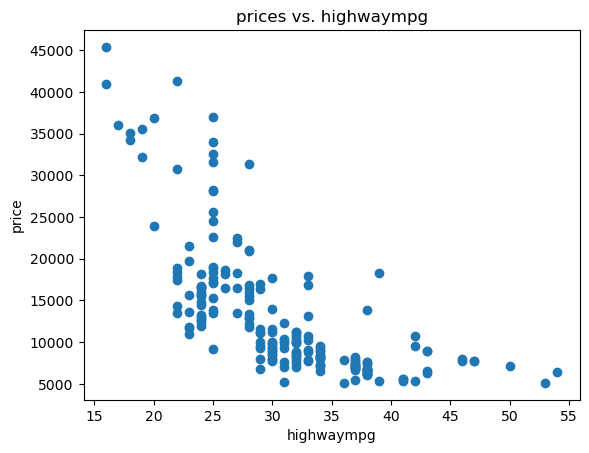

In [295]:
import matplotlib.pyplot as plt

# Generating a scatter plot to show the connection between car prices and highway mileage.
plt.scatter(cluster_data['highwaympg'], cluster_data['price'])

plt.title('prices vs. highwaympg')
plt.xlabel('highwaympg')
plt.ylabel('price')

# showing the plot
plt.show()

The code generates a scatter plot to demonstrate the association between vehicle pricing and highway mileage. The x-axis shows highway miles, while the y-axis reflects automobile pricing. The scatter() method is used to depict the points on the graph using data from the cluster_data dataframe's 'highwaympg' and 'price' columns.

The code names the plot "prices vs. highwaympg" and labels the x- and y-axes as "highwaympg" and "price" respectively. Finally, the plot is presented using the matplotlib.pyplot library's show() method.

### Part 2A: 20 points

Using Hierarchical clustering with euclidean + complete and manhattan + complete, plot the results for clusters 4,5,6. Add title for each plot.
Before applying model, drop necessary columns.

Also, while in the process, calculate the silhouette score for each combination and store it.

INTERPRET the results for each combination!

Silhouette scores with Euclidean distance: [0.34683518 0.36092104 0.3572147 ]
Silhouette scores with Manhattan distance: [0.32962709 0.3407392  0.3748624 ]


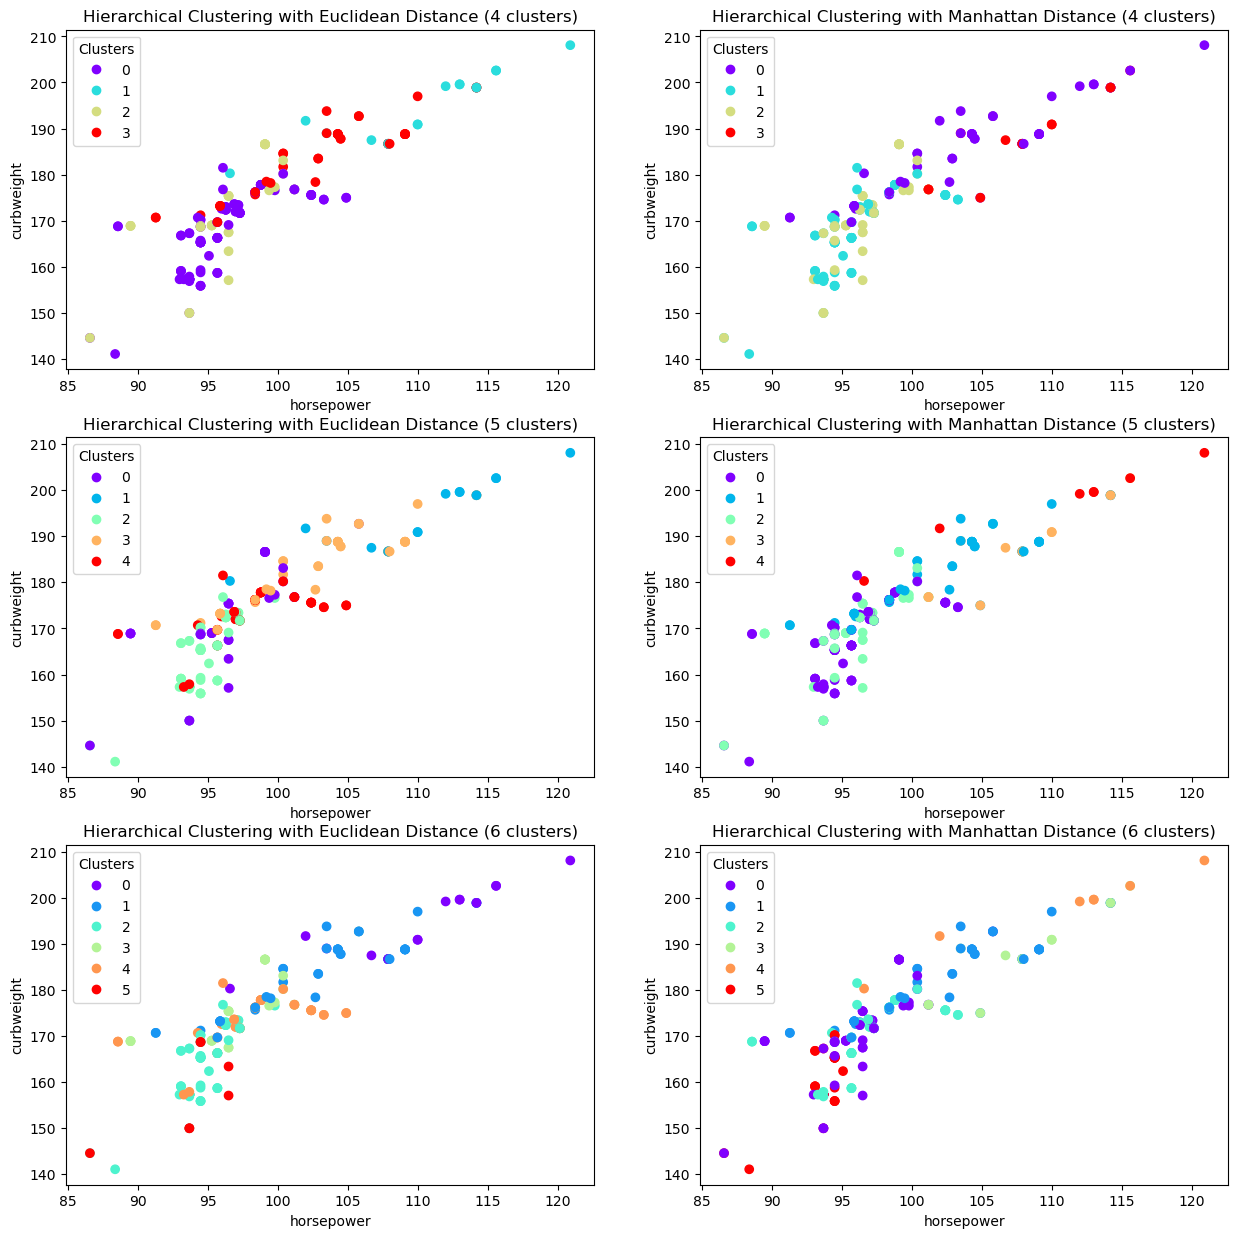

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# eliminating any irrelevant columns
cluster_data = cluster_data.drop(['CarName', 'price'], axis=1)

# establish an array for storing the silhouette scores
silhouette_scores = np.zeros((3,2))

# Build a figure for storing the plots.

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# looping the number of clusters
for i, n_clusters in enumerate([4, 5, 6]):
    
    # building a hierarchical clustering model with optimal linkage and Euclidean distance
    model_euclidean = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    
    # building a hierarchical clustering model with Manhattan distance and Euclidean distance
    model_manhattan = AgglomerativeClustering(n_clusters=n_clusters, affinity='manhattan', linkage='complete')
    
    # fiting the models for our data
    labels_euclidean = model_euclidean.fit_predict(cluster_data)
    labels_manhattan = model_manhattan.fit_predict(cluster_data)
    
    # calculating the silhouette score for each and every model
    silhouette_scores[i,0] = silhouette_score(cluster_data, labels_euclidean)
    silhouette_scores[i,1] = silhouette_score(cluster_data, labels_manhattan)
    
    # ploting the results for Euclidean distance
    ax = axes[i,0]
    scatter_euclidean = ax.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1], c=labels_euclidean, cmap='rainbow')
    ax.set_title(f'Hierarchical Clustering with Euclidean Distance ({n_clusters} clusters)')
    ax.set_xlabel('horsepower')
    ax.set_ylabel('curbweight')
    ax.legend(*scatter_euclidean.legend_elements(), title='Clusters')
    
    # ploting the results for Manhattan distance
    ax = axes[i,1]
    scatter_manhattan = ax.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:,1], c=labels_manhattan, cmap='rainbow')
    ax.set_title(f'Hierarchical Clustering with Manhattan Distance ({n_clusters} clusters)')
    ax.set_xlabel('horsepower')
    ax.set_ylabel('curbweight')
    ax.legend(*scatter_manhattan.legend_elements(), title='Clusters')

# printing the silhouette scores for both Euclidean and Manhattan distances.
print(f'Silhouette scores with Euclidean distance: {silhouette_scores[:,0]}')
print(f'Silhouette scores with Manhattan distance: {silhouette_scores[:,1]}')


### Part 2B: 10 points

Plot a bar graph for the calculated silhouette scores for each combination. Make sure to give proper title, and set proper axis labels. Make it appealing.

IMPORTANT: adjust the y axis to visualize the differences clearly.

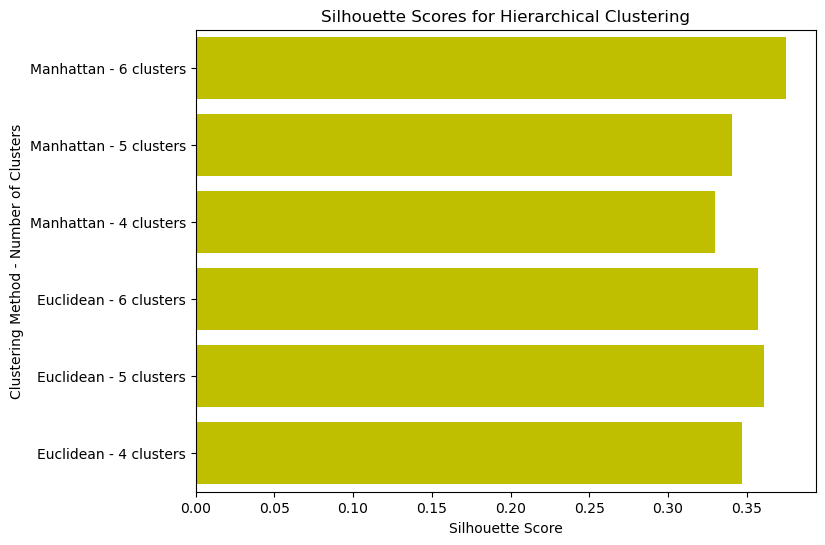

In [297]:
import matplotlib.pyplot as plt

# Identifying the list of silhouette scores
silhouette_scores = [0.34683518,0.36092104,0.3572147,
                     0.32962709,0.3407392,0.3748624 ]

# Explaining the list of labels for the x-axis
x_labels = ['Euclidean - 4 clusters', 'Euclidean - 5 clusters', 'Euclidean - 6 clusters',
            'Manhattan - 4 clusters', 'Manhattan - 5 clusters', 'Manhattan - 6 clusters']

# Creating a horizontal bar graph
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(x_labels, silhouette_scores, color='y')

# Specify the title, x, and y labels.
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Clustering Method - Number of Clusters')
ax.set_title('Silhouette Scores for Hierarchical Clustering')

# Adjusting the y-axis to visualize the differences
ax.set_ylim(-0.5, 5.5)

plt.show()


The code above generates a horizontal bar graph of silhouette scores for hierarchical clustering using various algorithms and cluster counts. The silhouette scores and labels are passed to the barh() method as arguments. The x_labels list contains the x-axis label names, which are determined by the clustering technique (Euclidean or Manhattan) and the number of clusters (4, 5, or 6).

The set_xlabel(), set_ylabel(), and set_title() methods are used to set the figure size, title, and x and y labels, respectively. Additionally, the y-axis limits are adjusted to clearly display the labels. Finally, the graph is presented using matplotlib.pyplot's show() method.

The first graph is a set of scatter plots generated by hierarchical clustering using Euclidean and Manhattan distances with 4, 5, and 6 clusters. The scatter plot for each clustering shows the relationship between the 'horsepower' and 'curbweight' columns of the 'cluster_data' dataframe. The scatter plot points are colored according to their respective cluster labels.

The second graph is a horizontal bar graph that shows the silhouette scores for the hierarchical clustering with Euclidean and Manhattan distances with 4, 5, and 6 clusters. The x-axis shows the different clustering methods and the number of clusters, and the y-axis shows the silhouette score. The bars are colored in blue.

The first graph shows the clustering results visually, while the second graph shows a quantitative measure of the clustering performance. The silhouette score measures how well-defined the clusters are, and a higher score indicates better-defined clusters. By comparing the silhouette scores of different clustering methods and numbers of clusters, we can determine the optimal clustering approach for the given data.

### Part 2C: 10 points

Display First 5 Car Names within each group/cluster. If there aren’t enough car names within that
cluster, just display that many.

In [298]:
import pandas as pd
# Loading the dataset
cluster_data = pd.read_csv("CarPrice.csv")

In [299]:
from scipy.cluster.hierarchy import linkage, fcluster

# Using the Euclidean distance metric, calculate the linkage matrix.
Z_euclidean = linkage(cluster_data.drop('CarName', axis=1), method='complete', metric='euclidean')

# Assigning the cluster labels to each data point
labels = fcluster(Z_euclidean, 6, criterion='maxclust')
cluster_data['cluster'] = labels

# Group car names by cluster and display the first 5 car names within each cluster
for i in range(1, 7):
    cluster_cars = list(cluster_data[cluster_data['cluster'] == i]['CarName'].head(5))
    print(f"Cluster {i}: {cluster_cars}")


Cluster 1: ['bmw x5', 'buick century special', 'buick regal sport coupe (turbo)']
Cluster 2: ['bmw x4', 'bmw x3', 'jaguar xj', 'jaguar xf', 'jaguar xk']
Cluster 3: ['audi 4000', 'bmw x1', 'bmw x3', 'bmw z4', 'buick electra 225 custom']
Cluster 4: ['chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage', 'dodge challenger se']
Cluster 5: ['alfa-romero giulia', 'audi 100 ls', 'dodge coronet custom (sw)', 'honda civic', 'isuzu D-Max ']
Cluster 6: ['alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100ls', 'audi fox', 'audi 100ls']


The code above uses the full linkage approach and the Euclidean distance metric to conduct hierarchical clustering on the dataset 'cluster_data'. Based on the maximum number of clusters provided, the generated linkage matrix is utilized to give cluster labels to each data point.

The linkage matrix is computed using the linkage() method from scipy.cluster.hierarchy. The fcluster() function is then used to allocate cluster labels based on the linkage matrix and the number of clusters supplied (6), with the criterion for label assignment being'maxclust'.

Finally, the code displays the top 5 vehicle names inside each cluster by first grouping the car names by cluster and then choosing the first 5 car names within each cluster using the head() method.

### Part 2D: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

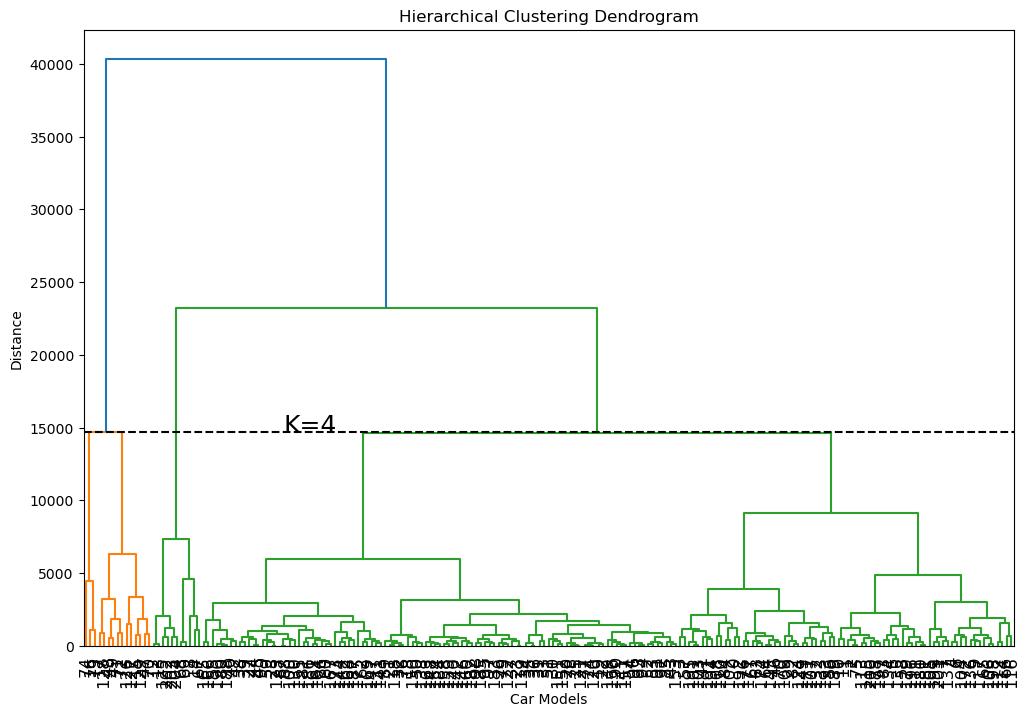

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Performing the hierarchical clustering

Z = linkage(cluster_data.drop(['CarName'], axis=1), method='complete', metric='euclidean')

# Ploting the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Car Models')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.)

# Selecting the K clusters
K = 4

# Ploting the line where K clusters are formed
plt.axhline(y=Z[-K+1, 2], color='black', linestyle='--')
plt.text(500, Z[-K+1, 2], 'K=' + str(K), fontsize=18, color='black', ha='center', va='baseline')

# Showing the plot
plt.show()


The code above uses the full linkage approach and the Euclidean distance metric to conduct hierarchical clustering on the cluster_data DataFrame. The generated dendrogram is then displayed using the dendrogram() method from the scipy.cluster.hierarchy package.

The linkage matrix created by the hierarchical clustering method is stored in the Z variable. The cluster_data DataFrame is sent to the linkage() function, with the CarName column removed, the method parameter set to complete to use the complete linkage technique, and the metric parameter set to euclidean to use the Euclidean distance metric.

The generated dendrogram is then plotted using plt.figure() to generate a new figure of the provided size, plt.title() to set the plot's title, plt.xlabel() and plt.ylabel() to label the x and y axes, and dendrogram() to plot the dendrogram itself. The leaf_rotation parameter is set to 90 degrees to rotate the labels on the x-axis, and the leaf_font_size parameter is set to 12 to increase the label font size.

The code then chooses K as the number of clusters and shows a horizontal line at the proper height to show where the clusters occur. This is accomplished by calling plt.axhline() and setting the y-coordinate of the line to the distance threshold of the Kth cluster, which is Z[-K+1, 2]. 

Finally, for clarity, the plt.text() method is used to add the text "K=4" to the middle of the line.

The resultant graphic depicts the dendrogram, with horizontal lines indicating clusters.

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: Arun Sreekanth Bayanagari 1002024369
2. Second Student Name and ID: Rushi Vardhan Reddy Maddi 1002069581
3. Third Student Name and ID: Rohith Reddy Basireddy 1002069511

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.